## **DATASET**

In [1]:
import pandas as pd

df = pd.read_csv("RTA Dataset.csv")
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## **Seleção de Features**

In [2]:
#features = ['Age_band_of_driver', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Driving_experience', 'Type_of_collision', 'Type_of_vehicle', 'Area_accident_occured']

#features = ['Age_band_of_driver', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Driving_experience', 'Type_of_collision']

features = ['Age_band_of_driver', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Driving_experience']

## **Tratamento do DataSet**

**Transformação de Valores Categóricos em Valores Numéricos**

In [3]:
#Converter 'Driving_experience' para valores numéricos
experiencia = {
    'Less than 1yr': 1,
    '1-2yr': 2,
    '2-5yr': 3,
    '5-10yr': 4,
    'Above 10yr': 5
}

df['Driving_experience'] = df['Driving_experience'].map(experiencia)

#Converter 'Age_band_of_driver' para valores numéricos 
idade = {
    'Under 18': 1,
    '18-30': 2,
    '31-50': 3,
    'Over 51': 4,
    'Unknown': 5
}

df['Age_band_of_driver'] = df['Age_band_of_driver'].map(idade)

#Converter 'Type_of_vehicle' para valores numéricos
veiculo = {
    'Automobile': 1,
    'Public (> 45 seats)': 2,
    'Lorry (41?100Q)': 3,
    'Vehicle with vehicle collision': 4,
    'Public (13?45 seats)': 5,
    'Lorry (11?40Q)': 6,
    'Long lorry': 7,
    'Public (12 seats)': 8,
    'Taxi': 9,
    'Pick up upto 10Q': 10,
    'Stationwagen': 11,
    'Ridden horse': 12,
    'Other': 13,
    'Bajaj': 14,
    'Turbo': 15,
    'Motorcycle': 16,
    'Special vehicle': 17,
    'Bicycle': 18
}

df['Type_of_vehicle'] = df['Type_of_vehicle'].map(veiculo)

#Converter 'Type_of_collision' para valores numéricos
colisao = {
    'Collision with roadside-parked vehicles': 1,
    'Vehicle with vehicle collision': 2,
    'Collision with roadside objects': 3,
    'Collision with animals': 4,
    'Other': 5,
    'Rollover': 6,
    'Fall from vehicles': 7,
    'Collision with pedestrians': 8,
    'With Train': 9,
    'Unknown': 10
}

df['Type_of_collision'] = df['Type_of_collision'].map(colisao)

#Converter 'Area_accident_occured' para valores numéricos
area = {
    'Residential areas': 1,
    'Office areas': 2,
    'Recreational areas': 3,
    'Industrial areas': 4,
    'Other': 5,
    'Church areas': 6,
    'Market areas': 7,
    'Unknown': 8,
    'Rural village areas': 9,
    'Outside rural areas': 10,
    'Hospital areas': 11,
    'School areas': 12,
    'Rural village areasOffice areas': 13  
}

df['Area_accident_occured'] = df['Area_accident_occured'].map(area)



**Valores em Falta**

In [4]:
#df.info()

#Substituir valores em falta pela mediana
df['Driving_experience'].fillna(df['Driving_experience'].median(), inplace=True)

#Substituir valores em falta pela moda
mode_area_accident_occured = df['Area_accident_occured'].mode()[0]
df['Area_accident_occured'].fillna(mode_area_accident_occured, inplace=True)

mode_type_of_collision = df['Type_of_collision'].mode()[0]
df['Type_of_collision'].fillna(mode_type_of_collision, inplace=True)

mode_type_of_vehicle = df['Type_of_vehicle'].mode()[0]
df['Type_of_vehicle'].fillna(mode_type_of_collision, inplace=True)

#df.info()

/var/folders/zf/z8blz_3x26lbgz564tt3z1rr0000gn/T/ipykernel_15218/3527396623.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driving_experience'].fillna(df['Driving_experience'].median(), inplace=True)
/var/folders/zf/z8blz_3x26lbgz564tt3z1rr0000gn/T/ipykernel_15218/3527396623.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

# **PARTE 1 - DADOS NÃO BALANCEADOS**

## **Visualização dos Dados**

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


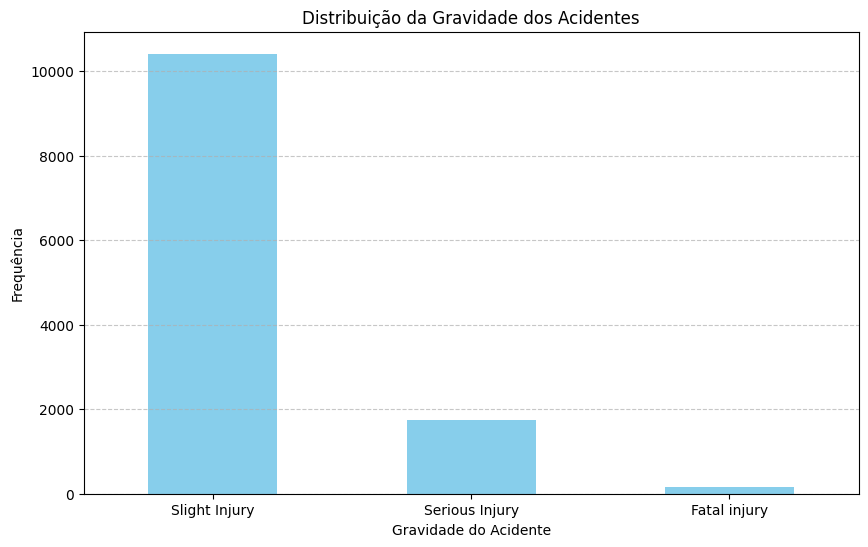

In [5]:
import matplotlib.pyplot as plt

severity_counts = df['Accident_severity'].value_counts()
print(severity_counts)

plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Gravidade dos Acidentes')
plt.xlabel('Gravidade do Acidente')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Accident_severity2
Slight Injury           10415
Serious/Fatal Injury     1901
Name: count, dtype: int64


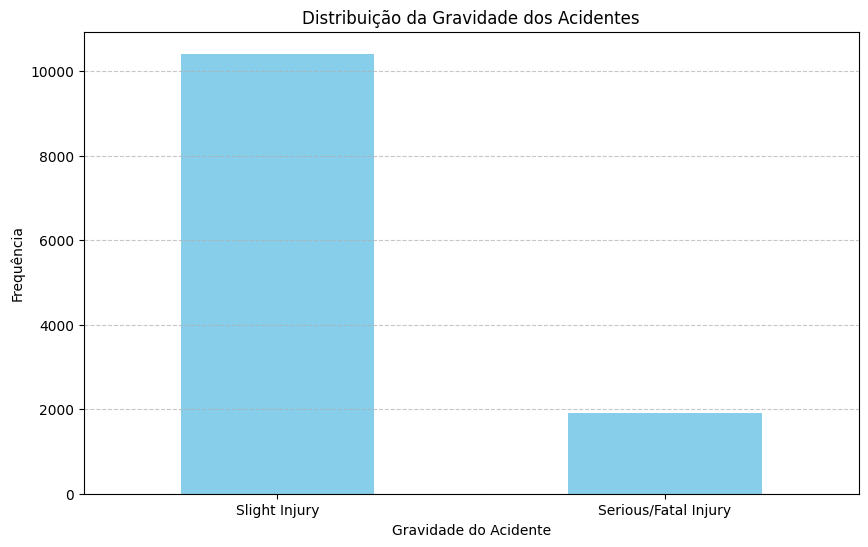

In [6]:
#Juntar as duas Injurys
df['Accident_severity2'] = df['Accident_severity'].replace({'Serious Injury': 'Serious/Fatal Injury', 'Fatal Injury': 'Serious/Fatal Injury', 'Fatal injury': 'Serious/Fatal Injury'})
#print(df['Accident_severity2'].unique())

severity_counts2 = df['Accident_severity2'].value_counts()
print(severity_counts2)

plt.figure(figsize=(10, 6))
severity_counts2.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Gravidade dos Acidentes')
plt.xlabel('Gravidade do Acidente')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Padronização e Divisão de Dados em Teste/Treino**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#-------------------------------------------------------3 Lesões-------------------------------------------------------
X = df[features]
y = df['Accident_severity']  

#Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#-------------------------------------------------------2 Lesões-------------------------------------------------------

X_2 = df[features]
y_2 = df['Accident_severity2']  

#Divisão dos dados
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

#Padronização dos dados
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

## **Modelo SVM**

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import expon, reciprocal

modelo_svm = SVC(random_state=42)

parametros = {
    'kernel': ['linear', 'rbf'],  #dois kernels
    'C': reciprocal(1, 1000),  #distribuição log-uniforme
    'gamma': expon(scale=1.0)  #distribuição exponencial
}

#-------------------------------------------------------3 Lesões-------------------------------------------------------

search = RandomizedSearchCV(modelo_svm, parametros, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)

search.fit(X_train_scaled, y_train)

#Melhores parâmetros e melhor pontuação
print(f"Melhores parâmetros: {search.best_params_}")
print(f"Melhor pontuação F1 ponderada: {search.best_score_ * 100:.2f}%")

#Avaliação
best_model = search.best_estimator_
y_pred_SVM = best_model.predict(X_test_scaled)
print("Modelo SVM para 3 Lesões:")
print(classification_report(y_test, y_pred_SVM, zero_division=1))

#-------------------------------------------------------2 Lesões-------------------------------------------------------

search2 = RandomizedSearchCV(modelo_svm, parametros, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)

search2.fit(X_train_scaled2, y_train2)

#Melhores parâmetros e melhor pontuação
print(f"Melhores parâmetros: {search2.best_params_}")
print(f"Melhor pontuação F1 ponderada: {search2.best_score_ * 100:.2f}%")

#Avaliação
best_model = search2.best_estimator_
y_pred_SVM = best_model.predict(X_test_scaled2)
print("Modelo SVM para 2 Lesões:")
print(classification_report(y_test2, y_pred_SVM, zero_division=1))


Melhores parâmetros: {'C': 834.1930294140774, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
Melhor pontuação F1 ponderada: 78.83%
Modelo SVM para 3 Lesões:
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      1.00        37
Serious Injury       0.43      0.04      0.08       363
 Slight Injury       0.84      0.99      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.42      0.34      0.66      2464
  weighted avg       0.77      0.84      0.79      2464

Melhores parâmetros: {'C': 834.1930294140774, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
Melhor pontuação F1 ponderada: 78.92%
Modelo SVM para 2 Lesões:
                      precision    recall  f1-score   support

Serious/Fatal Injury       0.44      0.05      0.09       400
       Slight Injury       0.84      0.99      0.91      2064

            accuracy                           0.84      2464
           macro avg       0.64      0.52

## **Redes Neurais - Modelo Automático**

In [9]:
#Modelo Automático

from sklearn.neural_network import MLPClassifier

#MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=74)
mlp.fit(X_train_scaled, y_train)
y_pred_NN = mlp.predict(X_test_scaled)

print("Modelo Redes Neurais para 3 Lesões:")
print(classification_report(y_test, y_pred_NN, zero_division=1)) #3 Lesões

#MLPClassifier
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=74)
mlp2.fit(X_train_scaled2, y_train2)
y_pred_NN2 = mlp2.predict(X_test_scaled2)

print("Modelo Redes Neurais para 2 Lesões:")
print(classification_report(y_test2, y_pred_NN2, zero_division=1)) #2 Lesões

Modelo Redes Neurais para 3 Lesões:
                precision    recall  f1-score   support

  Fatal injury       1.00      0.00      0.00        37
Serious Injury       0.58      0.04      0.08       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.81      0.35      0.33      2464
  weighted avg       0.81      0.84      0.78      2464

Modelo Redes Neurais para 2 Lesões:
                      precision    recall  f1-score   support

Serious/Fatal Injury       0.52      0.03      0.06       400
       Slight Injury       0.84      0.99      0.91      2064

            accuracy                           0.84      2464
           macro avg       0.68      0.51      0.48      2464
        weighted avg       0.79      0.84      0.77      2464



## **Redes Neurais - Modelo Manual**

In [10]:
#Modelo Manual

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Função de ativação sigmoid e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#-------------------------------------------------------3 Lesões-------------------------------------------------------

#Codificação de classes (Valores Categóricos para Numéricos)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#Converter y_train_encoded para one-hot (Saída da Rede Neural)
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = np.eye(num_classes)[y_train_encoded]

#Inicialização dos pesos
np.random.seed(42)
input_size = X_train_scaled.shape[1]
hidden_size = 10  
output_size = num_classes

weights1 = np.random.rand(input_size, hidden_size)
weights2 = np.random.rand(hidden_size, output_size)

#treino
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    #Forward propagation
    hidden_layer_input = np.dot(X_train_scaled, weights1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_output = sigmoid(np.dot(hidden_layer_output, weights2))
    
    #Backpropagation
    error = y_train_onehot - final_output
    d_predicted_output = error * sigmoid_derivative(final_output)
    
    error_hidden_layer = d_predicted_output.dot(weights2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    #Atualização dos pesos
    weights2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights1 += X_train_scaled.T.dot(d_hidden_layer) * learning_rate

hidden_layer_input_test = np.dot(X_test_scaled, weights1)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
final_output_test = sigmoid(np.dot(hidden_layer_output_test, weights2))
y_pred_classes = np.argmax(final_output_test, axis=1)

#Converter previsões numéricas para rótulos categóricos
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

#-------------------------------------------------------2 Lesões-------------------------------------------------------

# Codificação de classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train2)
y_test_encoded = label_encoder.transform(y_test2)

#Inicialização dos pesos
np.random.seed(42)
input_size = X_train_scaled2.shape[1]
hidden_size = 10  #valor escolhido
output_size = 1  # Um neurônio de saída para classificação binária

weights1 = np.random.rand(input_size, hidden_size)
weights2 = np.random.rand(hidden_size, output_size)

#treino
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    #Forward propagation
    hidden_layer_input = np.dot(X_train_scaled2, weights1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_output = sigmoid(np.dot(hidden_layer_output, weights2))
    
    #Backpropagation
    error = y_train_encoded.reshape(-1, 1) - final_output
    d_predicted_output = error * sigmoid_derivative(final_output)
    
    error_hidden_layer = d_predicted_output.dot(weights2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    #Atualização dos pesos
    weights2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights1 += X_train_scaled2.T.dot(d_hidden_layer) * learning_rate

hidden_layer_input_test = np.dot(X_test_scaled2, weights1)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
final_output_test = sigmoid(np.dot(hidden_layer_output_test, weights2))
y_pred_classes = (final_output_test > 0.5).astype(int).flatten()

y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))



/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        37
Serious Injury       0.00      0.00      0.00       363
 Slight Injury       0.84      1.00      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.28      0.33      0.30      2464
  weighted avg       0.70      0.84      0.76      2464

                      precision    recall  f1-score   support

Serious/Fatal Injury       0.60      0.01      0.01       400
       Slight Injury       0.84      1.00      0.91      2064

            accuracy                           0.84      2464
           macro avg       0.72      0.50      0.46      2464
        weighted avg       0.80      0.84      0.77      2464



## **RandomForest**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#-------------------------------------------------------3 Lesões-------------------------------------------------------

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train_scaled, y_train)

y_pred_RF = random_forest.predict(X_test_scaled)

print("Modelo RandomForest para 3 Lesões:")
print(classification_report(y_test, y_pred_RF, zero_division=1))

#-------------------------------------------------------2 Lesões-------------------------------------------------------

random_forest2 = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest2.fit(X_train_scaled2, y_train2)

y_pred_RF2 = random_forest2.predict(X_test_scaled2)

print("Modelo RandomForest para 2 Lesões:")
print(classification_report(y_test2, y_pred_RF2, zero_division=1))


Modelo RandomForest para 3 Lesões:
                precision    recall  f1-score   support

  Fatal injury       0.25      0.03      0.05        37
Serious Injury       0.51      0.05      0.09       363
 Slight Injury       0.84      0.99      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.54      0.36      0.35      2464
  weighted avg       0.79      0.84      0.78      2464

Modelo RandomForest para 2 Lesões:
                      precision    recall  f1-score   support

Serious/Fatal Injury       0.47      0.06      0.10       400
       Slight Injury       0.84      0.99      0.91      2064

            accuracy                           0.84      2464
           macro avg       0.66      0.52      0.50      2464
        weighted avg       0.78      0.84      0.78      2464



# **PARTE 2 - DADOS BALANCEADOS**

## **Balanceamento dos Dados, Padronização e Divisão de Dados em Teste/Treino**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


#-------------------------------------------------------3 Lesões-------------------------------------------------------

X = df[features]
y = df['Accident_severity']  

#Divisão dos dados para 3 Lesões
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X, y, test_size=0.2, random_state=42)

#-------------------------------------------------------2 Lesões-------------------------------------------------------

X_2 = df[features]
y_2 = df['Accident_severity2']  

#Divisão dos dados para 2 Lesões
X_train_balanced2, X_test_balanced2, y_train_balanced2, y_test_balanced2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

#--------------------------------------------------Balanceamento dos dados--------------------------------------------------

#Balanceamento dos dados para 3 Lesões
train_combined = pd.concat([X_train_balanced, y_train_balanced.reset_index(drop=True)], axis=1)

slight_injury = train_combined[train_combined['Accident_severity'] == 'Slight Injury']
fatal_injury = train_combined[train_combined['Accident_severity'] == 'Fatal injury']
serious_injury = train_combined[train_combined['Accident_severity'] == 'Serious Injury']

serious_injury_upsampled = resample(serious_injury, replace=True, n_samples=len(slight_injury), random_state=42)
fatal_injury_upsampled = resample(fatal_injury, replace=True, n_samples=len(slight_injury), random_state=42)

balanced_data = pd.concat([slight_injury, serious_injury_upsampled, fatal_injury_upsampled])

X_train_balanced = balanced_data.drop('Accident_severity', axis=1)
y_train_balanced = balanced_data['Accident_severity']

#Balanceamento dos dados para 2 Lesões
train_combined2 = pd.concat([X_train_balanced2, y_train_balanced2.reset_index(drop=True)], axis=1)

slight_injury2 = train_combined2[train_combined2['Accident_severity2'] == 'Slight Injury']
serious_fatal_injury2 = train_combined2[train_combined2['Accident_severity2'] == 'Serious/Fatal Injury']

serious_fatal_injury_upsampled2 = resample(serious_fatal_injury2, replace=True, n_samples=len(slight_injury2), random_state=42)

balanced_data2 = pd.concat([slight_injury2, serious_fatal_injury_upsampled2])

X_train_balanced2 = balanced_data2.drop('Accident_severity2', axis=1)
y_train_balanced2 = balanced_data2['Accident_severity2']

#-----------------------------------------------------Padronização dos dados--------------------------------------------------

scaler = StandardScaler()

#Padronização dos dados para 3 Lesões
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

#Padronização dos dados para 2 Lesões
X_train_balanced_scaled2 = scaler.fit_transform(X_train_balanced2)
X_test_balanced_scaled2 = scaler.transform(X_test_balanced2)


## **Visualização dos Dados**

Accident_severity2
Slight Injury           8351
Serious/Fatal Injury    8351
Name: count, dtype: int64


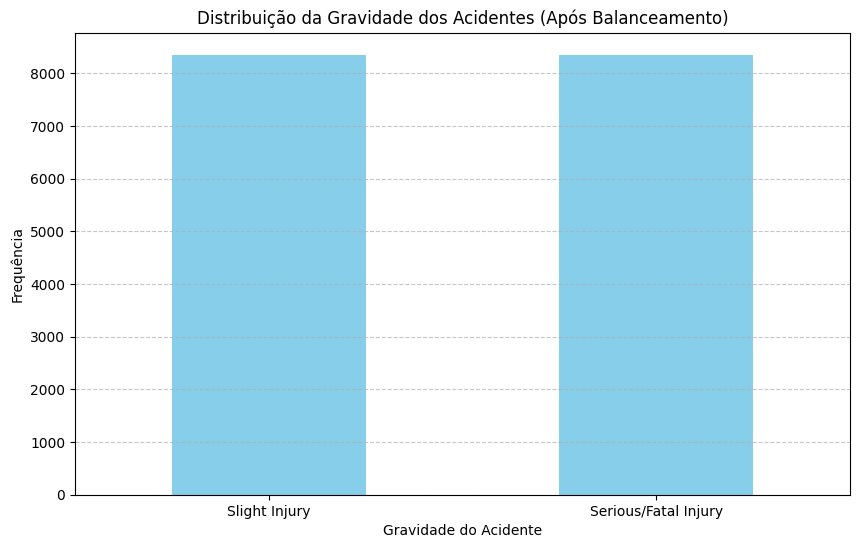

Accident_severity
Slight Injury     8351
Serious Injury    8351
Fatal injury      8351
Name: count, dtype: int64


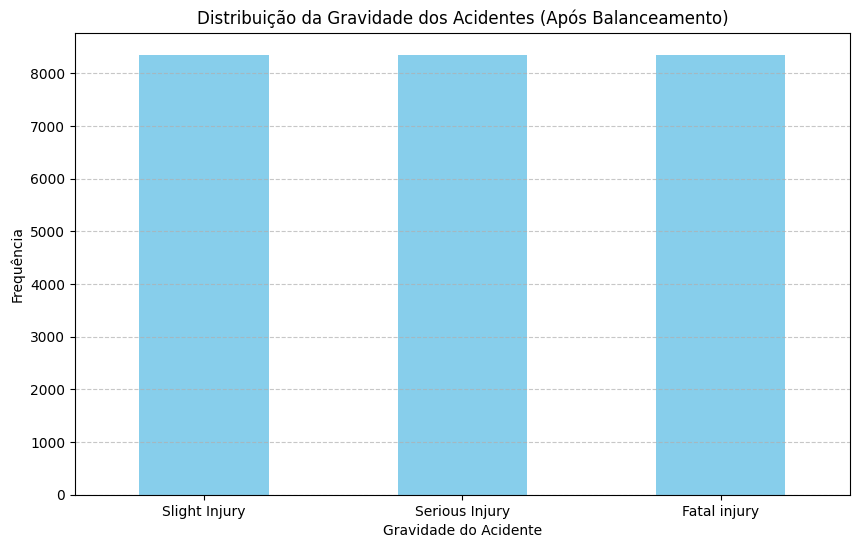

In [13]:
balanced_counts2 = y_train_balanced2.value_counts()
print(balanced_counts2)

plt.figure(figsize=(10, 6))
balanced_counts2.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Gravidade dos Acidentes (Após Balanceamento)')
plt.xlabel('Gravidade do Acidente')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

balanced_counts = y_train_balanced.value_counts()
print(balanced_counts)

plt.figure(figsize=(10, 6))
balanced_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Gravidade dos Acidentes (Após Balanceamento)')
plt.xlabel('Gravidade do Acidente')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Modelo SVM**

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import expon, reciprocal

#preencher valores ausentes
imputer = SimpleImputer(strategy='mean')
X_train_balanced_scaled_imputed = imputer.fit_transform(X_train_balanced_scaled)
X_test_balanced_scaled_imputed = imputer.transform(X_test_balanced_scaled)

X_train_balanced_scaled2_imputed = imputer.fit_transform(X_train_balanced_scaled2)
X_test_balanced_scaled2_imputed = imputer.transform(X_test_balanced_scaled2)

#Modelo SVM
modelo_svm = SVC(random_state=42)

# Parâmetros para pesquisa aleatória
parametros = {
    'kernel': ['linear', 'rbf'],  #Dois tipos de kernel
    'C': reciprocal(1, 1000),      #Distribuição log-uniforme
    'gamma': expon(scale=1.0)      #Distribuição exponencial
}

#-------------------------------------------------------3 Lesões-------------------------------------------------------

search = RandomizedSearchCV(modelo_svm, parametros, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
search.fit(X_train_balanced_scaled_imputed, y_train_balanced)

print(f"Melhores parâmetros para 3 Lesões: {search.best_params_}")
print(f"Melhor pontuação F1 ponderada para 3 Lesões: {search.best_score_ * 100:.2f}%")

y_pred_SVM = search.best_estimator_.predict(X_test_balanced_scaled_imputed)
print("\nModelo SVM para 3 Lesões:")
print(classification_report(y_test_balanced, y_pred_SVM, zero_division=1))

#-------------------------------------------------------2 Lesões-------------------------------------------------------

search2 = RandomizedSearchCV(modelo_svm, parametros, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
search2.fit(X_train_balanced_scaled2_imputed, y_train_balanced2)

print(f"\nMelhores parâmetros para 2 Lesões: {search2.best_params_}")
print(f"Melhor pontuação F1 ponderada para 2 Lesões: {search2.best_score_ * 100:.2f}%")

y_pred_SVM2 = search2.best_estimator_.predict(X_test_balanced_scaled2_imputed)
print("\nModelo SVM para 2 Lesões:")
print(classification_report(y_test_balanced2, y_pred_SVM2, zero_division=1))


/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores parâmetros para 3 Lesões: {'C': 1.1527987128232398, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
Melhor pontuação F1 ponderada para 3 Lesões: 39.97%

Modelo SVM para 3 Lesões:
                precision    recall  f1-score   support

  Fatal injury       0.01      0.19      0.02        37
Serious Injury       0.16      0.25      0.19       363
 Slight Injury       0.84      0.43      0.57      2064

      accuracy                           0.40      2464
     macro avg       0.33      0.29      0.26      2464
  weighted avg       0.72      0.40      0.51      2464


Melhores parâmetros para 2 Lesões: {'C': 1.1527987128232398, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
Melhor pontuação F1 ponderada para 2 Lesões: 45.74%

Modelo SVM para 2 Lesões:
                      precision    recall  f1-score   support

Serious/Fatal Injury       0.16      0.43      0.24       400
       Slight Injury       0.84      0.58      0.69      2064

            accuracy                          

## **Redes Neurais - Modelo Automático**

In [15]:
from sklearn.impute import SimpleImputer

mlp_balanced = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=74)

imputer = SimpleImputer(strategy='mean')
X_train_balanced_scaled_imputed = imputer.fit_transform(X_train_balanced_scaled)
X_test_balanced_scaled_imputed = imputer.transform(X_test_balanced_scaled)

mlp_balanced.fit(X_train_balanced_scaled_imputed, y_train_balanced)
y_pred_NN_balanced = mlp_balanced.predict(X_test_balanced_scaled_imputed)

print("Modelo Redes Neurais para 3 Lesões (Dados Balanceados):")
print(classification_report(y_test_balanced, y_pred_NN_balanced, zero_division=1))#3 Lesões

mlp_balanced2 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=74)

#substituir valores ausentes com a média
imputer = SimpleImputer(strategy='mean')
X_train_balanced_scaled2_imputed = imputer.fit_transform(X_train_balanced_scaled2)
X_test_balanced_scaled2_imputed = imputer.transform(X_test_balanced_scaled2)

mlp_balanced2.fit(X_train_balanced_scaled2_imputed, y_train_balanced2)
y_pred_NN_balanced2 = mlp_balanced2.predict(X_test_balanced_scaled2_imputed)

print("Modelo Redes Neurais para 2 Lesões (Dados Balanceados):")
print(classification_report(y_test_balanced2, y_pred_NN_balanced2, zero_division=1))#2 Lesões


Modelo Redes Neurais para 3 Lesões (Dados Balanceados):
                precision    recall  f1-score   support

  Fatal injury       0.01      0.22      0.02        37
Serious Injury       0.16      0.44      0.23       363
 Slight Injury       0.85      0.27      0.41      2064

      accuracy                           0.30      2464
     macro avg       0.34      0.31      0.22      2464
  weighted avg       0.73      0.30      0.38      2464

Modelo Redes Neurais para 2 Lesões (Dados Balanceados):
                      precision    recall  f1-score   support

Serious/Fatal Injury       0.17      0.41      0.24       400
       Slight Injury       0.84      0.60      0.70      2064

            accuracy                           0.57      2464
           macro avg       0.50      0.50      0.47      2464
        weighted avg       0.73      0.57      0.62      2464



## **Redes Neurais - Modelo Manual**

In [16]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

#Função de ativação sigmoid e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#-------------------------------------------------------3 Lesões com dados balanceados-------------------------------------------------------

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test_balanced)

#Converter y_train_encoded para one-hot
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = np.eye(num_classes)[y_train_encoded]

np.random.seed(42)
input_size = X_train_balanced_scaled.shape[1]
hidden_size = 10  
output_size = num_classes

weights1 = np.random.rand(input_size, hidden_size)
weights2 = np.random.rand(hidden_size, output_size)

learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    hidden_layer_input = np.dot(X_train_balanced_scaled, weights1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_output = sigmoid(np.dot(hidden_layer_output, weights2))
    
    error = y_train_onehot - final_output
    d_predicted_output = error * sigmoid_derivative(final_output)
    
    error_hidden_layer = d_predicted_output.dot(weights2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    weights2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights1 += X_train_balanced_scaled.T.dot(d_hidden_layer) * learning_rate

#dados de teste
hidden_layer_input_test = np.dot(X_test_balanced_scaled, weights1)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
final_output_test = sigmoid(np.dot(hidden_layer_output_test, weights2))
y_pred_classes = np.argmax(final_output_test, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

#-------------------------------------------------------2 Lesões com dados balanceados-------------------------------------------------------

#codificação de classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced2)
y_test_encoded = label_encoder.transform(y_test_balanced2)

np.random.seed(42)
input_size = X_train_balanced_scaled2.shape[1]
hidden_size = 10  #valor escolhido
output_size = 1  #Um neurônio de saída para classificação binária

weights1 = np.random.rand(input_size, hidden_size)
weights2 = np.random.rand(hidden_size, output_size)

#treino
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    #Forward propagation
    hidden_layer_input = np.dot(X_train_balanced_scaled2, weights1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_output = sigmoid(np.dot(hidden_layer_output, weights2))
    
    #Backpropagation
    error = y_train_encoded.reshape(-1, 1) - final_output
    d_predicted_output = error * sigmoid_derivative(final_output)
    
    error_hidden_layer = d_predicted_output.dot(weights2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    #Atualização dos pesos
    weights2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights1 += X_train_balanced_scaled2.T.dot(d_hidden_layer) * learning_rate

#dados de teste
hidden_layer_input_test = np.dot(X_test_balanced_scaled2, weights1)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
final_output_test = sigmoid(np.dot(hidden_layer_output_test, weights2))
y_pred_classes = (final_output_test > 0.5).astype(int).flatten()
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))


/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

                precision    recall  f1-score   support

  Fatal injury       0.02      1.00      0.03        37
Serious Injury       0.00      0.00      0.00       363
 Slight Injury       0.00      0.00      0.00      2064

      accuracy                           0.02      2464
     macro avg       0.01      0.33      0.01      2464
  weighted avg       0.00      0.02      0.00      2464

                      precision    recall  f1-score   support

Serious/Fatal Injury       0.16      1.00      0.28       400
       Slight Injury       0.00      0.00      0.00      2064

            accuracy                           0.16      2464
           macro avg       0.08      0.50      0.14      2464
        weighted avg       0.03      0.16      0.05      2464



/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/guilhermecardoso/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## **RandomForest**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

#preencher valores ausentes nos dados de treinamento e teste
X_train_balanced_scaled_imputed = imputer.fit_transform(X_train_balanced_scaled)
X_test_balanced_scaled_imputed = imputer.transform(X_test_balanced_scaled)

X_train_balanced_scaled2_imputed = imputer.fit_transform(X_train_balanced_scaled2)
X_test_balanced_scaled2_imputed = imputer.transform(X_test_balanced_scaled2)

#-------------------------------------------------------3 Lesões-------------------------------------------------------

random_forest_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_balanced.fit(X_train_balanced_scaled_imputed, y_train_balanced)

y_pred_RF_balanced = random_forest_balanced.predict(X_test_balanced_scaled_imputed)

print("Modelo RandomForest para 3 Lesões (Dados Balanceados):")
print(classification_report(y_test_balanced, y_pred_RF_balanced, zero_division=1))

#-------------------------------------------------------2 Lesões-------------------------------------------------------

random_forest_balanced2 = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_balanced2.fit(X_train_balanced_scaled2_imputed, y_train_balanced2)

y_pred_RF_balanced2 = random_forest_balanced2.predict(X_test_balanced_scaled2_imputed)

print("Modelo RandomForest para 2 Lesões (Dados Balanceados):")
print(classification_report(y_test_balanced2, y_pred_RF_balanced2, zero_division=1))


Modelo RandomForest para 3 Lesões (Dados Balanceados):
                precision    recall  f1-score   support

  Fatal injury       0.01      0.24      0.02        37
Serious Injury       0.16      0.24      0.19       363
 Slight Injury       0.83      0.42      0.56      2064

      accuracy                           0.39      2464
     macro avg       0.33      0.30      0.26      2464
  weighted avg       0.72      0.39      0.50      2464

Modelo RandomForest para 2 Lesões (Dados Balanceados):
                      precision    recall  f1-score   support

Serious/Fatal Injury       0.17      0.45      0.24       400
       Slight Injury       0.84      0.57      0.68      2064

            accuracy                           0.55      2464
           macro avg       0.50      0.51      0.46      2464
        weighted avg       0.73      0.55      0.61      2464

